# **Heart Disease Project**

### **Felicitia Ifianasa Lathifah**

**Dataset:** [Health Case Study](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)


---

# **Pendahuluan**

Setelah melakukan EDA dan feature engineering, langkah selanjutnya adalah membuat prediksi. Hal ini ditujukan untuk mengetahui kategori/kelas yang diperoleh melalui model dengan akurasi tinggi.

Secara khusus, machine learning dalam dataset [heart disease](https://https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) bertujuan untuk memprediksi peluang pasien terkena penyakit jantung berdasarkan data kesehatan mereka.

## **Business Understanding**

1.   Tujuan
- Membangun model machine learning untuk memprediksi kemungkinan pasien terkena penyakit jantung berdasarkan data kesehatan mereka.

2. Manfaat
- Membantu dokter dalam mendiagnosis penyakit jantung lebih dini.
- Membantu pasien dalam mengambil langkah-langkah pencegahan untuk mengurangi risiko penyakit jantung.
- Meningkatkan efisiensi sistem kesehatan dengan mengurangi biaya diagnosis dan perawatan.
3. Tantangan
- Keakuratan model machine learning dapat dipengaruhi oleh kualitas data.
Model machine learning harus diinterpretasikan dengan hati-hati untuk menghindari bias dan diskriminasi.

## **Business Metrics**



1. Akurasi: persentase prediksi yang benar.
2. Presisi: persentase pasien yang diprediksi memiliki penyakit jantung benar-benar memilikinya.
3. *Recall*: persentase pasien dengan penyakit jantung yang diprediksi secara benar.
4. F1-*score*: nilai keseimbangan antara presisi dan *recall*.

## **Workflow**



1. Data preparation
2. Data preprocessing (termasuk feature engineering)
3. Model training
4. Model evaluation
5. Model improvement

---

# **Data Preparation**


In [ ]:
#@title **Input Data**

# Import libraries
import pandas as pd

# Mendefinisikan tabel data
url = 'https://docs.google.com/spreadsheets/d/1gSWyvtI3SWxMvH0nO456uXpjbYnEYxT3SErfy-e43PI/export?format=csv#gid=2026738033'
### Cantumkan link data (Google Sheet) yang sudah diupload pada Google Drive agar tidak perlu upload file setiap akan run
df = pd.read_csv(url)

# Pembagian feature berdasarkan tipe data
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

# Memperbaiki tipe data categorical
df[categorical] = df[categorical]

# Menampilkan data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#@title **Deskripsi dan Tipe Data**

# Membuat tabel feature
features = pd.DataFrame({'Fitur': df.columns.to_list()})
features['Keterangan'] = [
                          'usia',
                          'jenis kelamin',
                          'chest pain type',
                          'gula darah (rest)',
                          'serum kolesterol',
                          'gula darah (fasting)',
                          'hasil elektrokardiografik (rest)',
                          'detak jantung maksimum',
                          'sakit dada ketika berolahraga',
                          'tekanan ST',
                          'kemiringan puncak tekanan ST',
                          'jumlah pembuluh darah yang tersumbat',
                          'detak jantung',
                          'ada tidaknya penyakit jantung']
def num_or_cat(x):
    if x in categorical:
        return 'Categorical'
    return 'Numeric'

features['Tipe Data'] = features['Fitur'].apply(num_or_cat)

# Menampilkan tabel
features

,Fitur,Keterangan,Tipe Data
0,age,usia,Numeric
1,sex,jenis kelamin,Categorical
2,cp,chest pain type,Categorical
3,trestbps,gula darah (rest),Numeric
4,chol,serum kolesterol,Numeric
5,fbs,gula darah (fasting),Categorical
6,restecg,hasil elektrokardiografik (rest),Categorical
7,thalach,detak jantung maksimum,Numeric
8,exang,sakit dada ketika berolahraga,Categorical
9,oldpeak,tekanan ST,Numeric


In [ ]:
#@title **Data Discovery/Understanding**

# Function untuk data check
def data_check(df):
    missing = df.isnull().sum()
    per_mis = 100*(missing/len(df))
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing" : missing,
                        "Percent_Missing" : per_mis,
                        "data_type": data_type,
                        "number_unique" : number_unique})
# Memunculkan hasil data check
print('''>> Tidak ada missing values. Artinya, tahap penghapusan missing values bisa dilewat.''')
data_check(df)

>> Tidak ada missing values. Artinya, tahap penghapusan missing values bisa dilewat.


,Missing,Percent_Missing,data_type,number_unique
age,0,0.0,int64,41
sex,0,0.0,int64,2
cp,0,0.0,int64,4
trestbps,0,0.0,int64,49
chol,0,0.0,int64,152
fbs,0,0.0,int64,2
restecg,0,0.0,int64,3
thalach,0,0.0,int64,91
exang,0,0.0,int64,2
oldpeak,0,0.0,float64,40


In [ ]:
#@title **Penghapusan Duplicated Data**

# Penghapusan Duplicated Data
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#@title **Penghapusan Error Values** (Kolom 'Thal')

print('''>> Fitur thal memiliki 4 unique value. Seharusnya hanya 3.''')
print('''>> Oleh karena itu, data dengan nilai 'thal' selain 1, 2, atau 3 akan dihapus.''')

# Baris dengan nilai 'thal' selain 1, 2, atau 3
true_values = [1,2,3]

# Penghapusan Error Values
df = df [df['thal'].isin(true_values)]
df.head

>> Fitur thal memiliki 4 unique value. Seharusnya hanya 3.
>> Oleh karena itu, data dengan nilai 'thal' selain 1, 2, atau 3 akan dihapus.


<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3       0  
2        0   0     3       0  
3        2   1     3       0  
4        1   3     2       0  
..     ...  ..   ...     ...  
723      1   0     2       1  
733      1   0     2       1  
739      2   1     3       0  
843      2   0     2       0  
878      1   1     3       0  

[300 rows x 14 columns]>

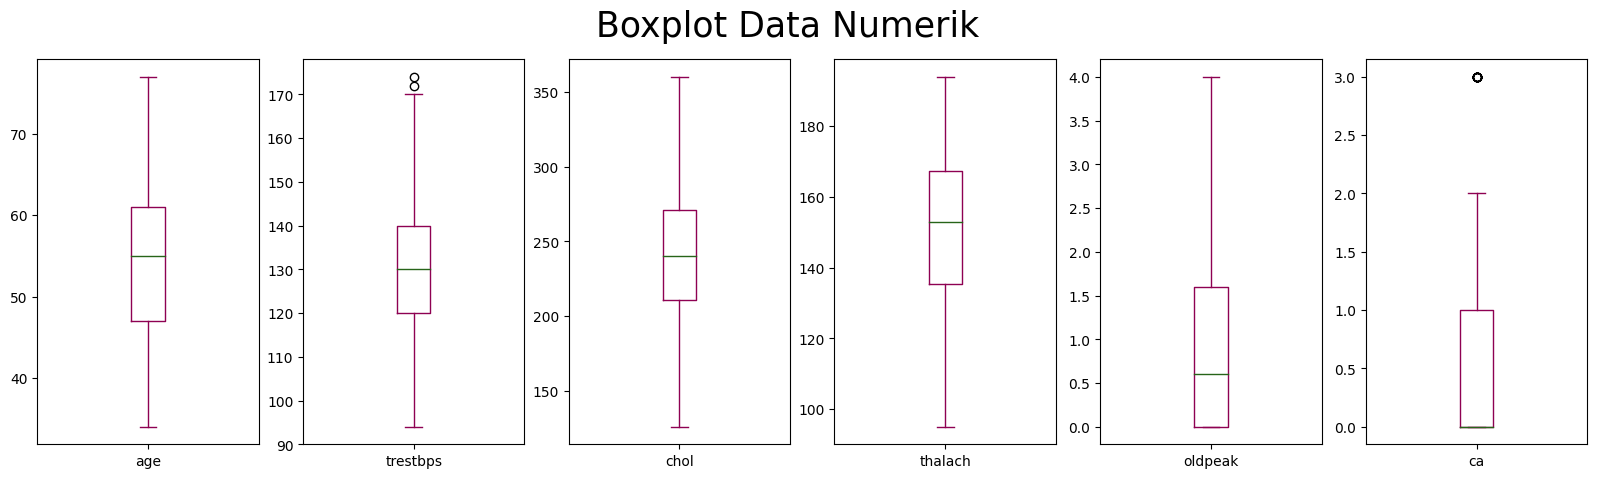

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
#@title **Penghapusan Outlier**

# Import library
import matplotlib.pyplot as plt
import numpy
import scipy.stats

# P(|z| > 2.576) = 1%
Z_Value = 2.576

# Uji outlier dengan Z-score
def not_outlier(x):
    return numpy.abs(scipy.stats.zscore(x)) < Z_Value

# Penghapusan outlier
df = df[not_outlier(df[numeric]).all(axis='columns')]

# Boxplot data numerik (hasil penghapusan)
df[numeric].plot(kind='box', subplots=True, figsize=(20,5), colormap = 'PiYG'), plt.suptitle('Boxplot Data Numerik', fontsize = 25)
plt.show()

# Munculkan dataframe yang sudah dibersihkan
df

# **Data Preprocessing**

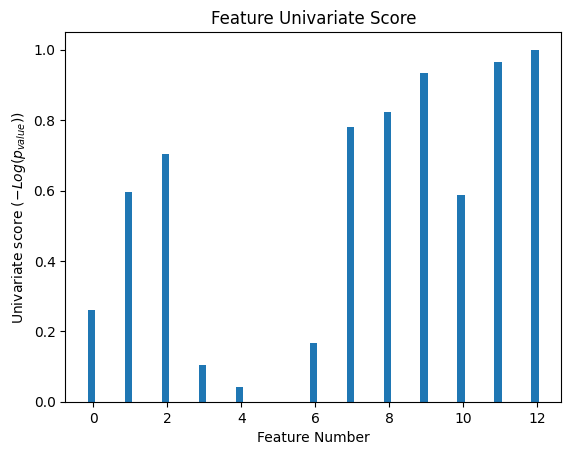

Diperoleh kode setiap fitur yang memiliki pengaruh secara signifikan terhadap target.
Dari 13 fitur, terdapat 10 fitur yang sangat signifikan, yakni:


<ipython-input-8-2c4771afaedb>:39: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  features.selected = features.loc[L]


,Fitur,Keterangan,Tipe Data
0,age,usia,Numeric
1,sex,jenis kelamin,Categorical
2,cp,chest pain type,Categorical
6,restecg,hasil elektrokardiografik (rest),Categorical
7,thalach,detak jantung maksimum,Numeric
8,exang,sakit dada ketika berolahraga,Categorical
9,oldpeak,tekanan ST,Numeric
10,slope,kemiringan puncak tekanan ST,Categorical
11,ca,jumlah pembuluh darah yang tersumbat,Numeric
12,thal,detak jantung,Categorical


In [ ]:
#@title **Feature Selection (Univariate)**

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Pisahkan data menjadi variabel dan target
variables = df.drop('target', axis='columns')
target = df['target']

# Split data (rasio 80:20)
train_variables, test_variables, train_target, test_target = train_test_split(
    variables,
    target,
    test_size = 0.2,
    random_state = 42
)

# Univariate Feature Selection
selector = SelectKBest(f_classif, k=4)
selector.fit(train_variables, train_target)
scores = -numpy.log10(selector.pvalues_)
scores /= scores.max()

variables_indices = numpy.arange(variables.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(variables_indices - 0.05, scores, width=0.2)
plt.title("Feature Univariate Score")
plt.xlabel("Feature Number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

print('Diperoleh kode setiap fitur yang memiliki pengaruh secara signifikan terhadap target.')
print('Dari 13 fitur, terdapat 10 fitur yang sangat signifikan, yakni:')

# Menampilkan tabel fitur
L = [0,1,2,6,7,8,9,10,11,12]
features.selected = features.loc[L]
features.selected

In [ ]:
#@title **Data Splitting**

# Munculkan dataframe data training dan testing
print('Data Splitting Result')
pd.DataFrame(
    {'count': [len(data) for data in ['train_variables', 'test_variables', 'train_target', 'train_target']]},
    index = ['train_variables', 'test_variables', 'train_target', 'test_target']
)

Data Splitting Result


,count
train_variables,15
test_variables,14
train_target,12
test_target,12


# **Machine Learning**

## **Model Training**

Akan dilakukan model training dengan dua metode klasifikasi, yakni **KNN** (mewakili tipe data numerik) dan **SVM** (mewakili tipe data numerik dan kategorikal).

### **Model 1: KNN**



**Alasan pemilihan:** merupakan model yang sederhana dan mudah dipahami, tidak memerlukan training, serta cocok untuk tipe data numerik.

In [ ]:
#@title Model Training

# Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Lakukan training pada model
model_knn = KNeighborsClassifier().fit(train_variables, train_target)

# Lakukan prediksi model
target.predict_knn = model_knn.predict(test_variables)

# Classification report
print(classification_report(test_target, target.predict_knn))

# Evaluasi akurasi model
accuracy_knn = accuracy_score(test_target, target.predict_knn)
print("Accuracy:", accuracy_knn)

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.78      0.69      0.74        36

    accuracy                           0.68        56
   macro avg       0.66      0.67      0.66        56
weighted avg       0.70      0.68      0.68        56

Accuracy: 0.6785714285714286


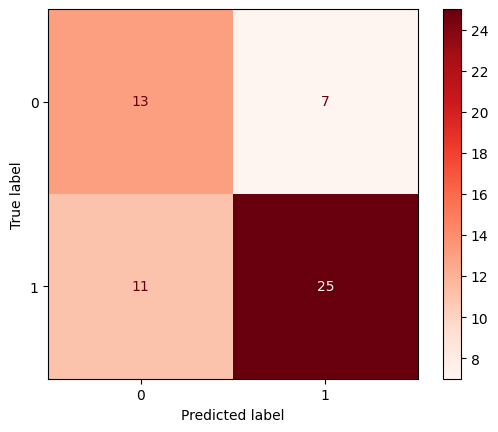

In [ ]:
#@title Confusion Matrix

# Import library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
matrix_knn = confusion_matrix(test_target, target.predict_knn)
ConfusionMatrixDisplay(matrix_knn).plot(cmap = 'Reds')
plt.show()

**Interpretasi**
- Model KNN memprediksi 38`(13 + 25)` data dengan benar dan 18`(7 + 11)` data dengan salah.
- Dari 20 data yang diprediksi benar, 13 termasuk `true positive` dan 7 lainnya `false positive`.
- Dari 36 data yang diprediksi benar, 11 termasuk `false negative` dan 25 lainnya `true negative`.

In [ ]:
#@title Cross Validation Basic

# Import library
from sklearn.model_selection import KFold, cross_val_score

# K-folds
k_folds = KFold(n_splits = 10)

# Cross validation
scores_knn = cross_val_score(model_knn, variables, target, cv = k_folds)
print(f'Average score = {scores_knn.mean()}')
pd.DataFrame(scores_knn, columns=['score']).T

Average score = 0.626984126984127


,0,1,2,3,4,5,6,7,8,9
score,0.642857,0.464286,0.607143,0.428571,0.785714,0.785714,0.740741,0.62963,0.703704,0.481481


**Interpretasi:** Dari 10 iterasi, diperoleh skor rata-rata sebesar 0,627.

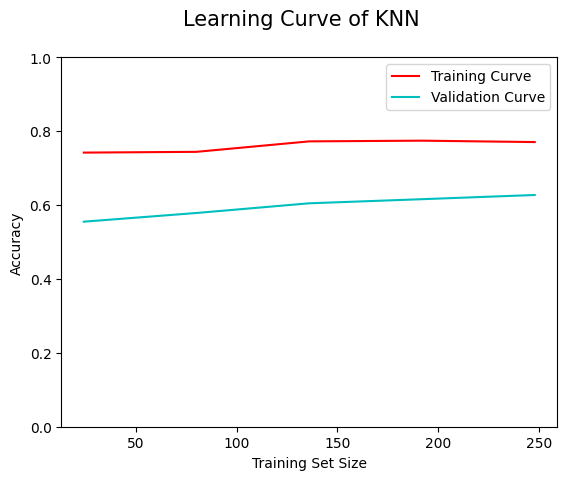

In [ ]:
#@title Learning Curves

# Import libraries
from sklearn.model_selection import learning_curve
from matplotlib import pyplot

# Learning curve
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(model_knn, variables, target, cv = k_folds)
pyplot.plot(train_sizes_knn, train_scores_knn.mean(axis = 1), color='r', label='Training Curve')
pyplot.plot(train_sizes_knn, test_scores_knn.mean(axis = 1), color='c', label='Validation Curve')
pyplot.suptitle('Learning Curve of KNN', fontsize = 15)
pyplot.legend()
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
pyplot.ylim(0,1)
plt.show()

**Interpretasi**
- Pada awal training, performa model pada data training dan testing cukup tinggi.
- Seiring bertambahnya data testing, validation curve semakin meningkat.
- Performa model pada data training cenderung meningkat, tetapi stabil setelah mencapai titik optimal.
- Kesenjangan antara training curve dan validation curve cukup besar, menunjukkan bahwa model **underfit.**

### **Model 2: SVM**



**Alasan pemilihan:** memiliki performa yang tinggi, mudah diinterpretasikan, serta cocok untuk data numerik dan kategorikal. Secara khusus, model yang digunakan adalah tipe SVC karena
If the hyperplane classifies the dataset linearly then the algorithm we call it as SVC and the algorithm that separates the dataset by non-linear approach then we call it as SVM.

In [ ]:
#@title Model Training

# Import library
from sklearn.svm import SVC

# Buat model SVC
model_svm = SVC()

# Lakukan training pada model
model_svm.fit(train_variables, train_target)

# Lakukan prediksi model
target.predict_svm = model_svm.predict(test_variables)

# Classification report
print(classification_report(test_target, target.predict_svm))

# Evaluasi akurasi model
accuracy_svm = accuracy_score(test_target, target.predict_svm)
print("Accuracy:", accuracy_svm)

              precision    recall  f1-score   support

           0       0.65      0.55      0.59        20
           1       0.77      0.83      0.80        36

    accuracy                           0.73        56
   macro avg       0.71      0.69      0.70        56
weighted avg       0.73      0.73      0.73        56

Accuracy: 0.7321428571428571


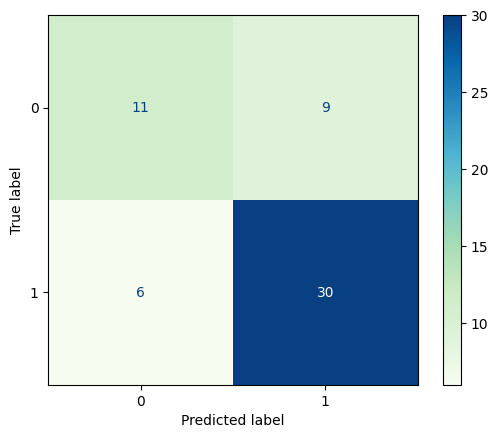

In [ ]:
#@title Confusion Matrix

# Import library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
matrix_svm = confusion_matrix(test_target, target.predict_svm)
ConfusionMatrixDisplay(matrix_svm).plot(cmap = 'GnBu')
plt.show()

**Interpretasi**
- Model SVC memprediksi 41`(11 + 30)` data dengan benar dan 15`(9 + 6)` data dengan salah.
- Dari 20 data yang diprediksi benar, 11 termasuk `true positive` dan 9 lainnya `false positive`.
- Dari 36 data yang diprediksi benar, 6 termasuk `false negative` dan 30 lainnya `true negative`.

In [ ]:
#@title Cross Validation Basic

# Cross validation
scores_svm = cross_val_score(model_svm, variables, target, cv = k_folds)
print(f'Average score = {scores_svm.mean()}')
pd.DataFrame(scores_svm, columns=['score']).T

Average score = 0.6411375661375661


,0,1,2,3,4,5,6,7,8,9
score,0.607143,0.607143,0.535714,0.535714,0.821429,0.785714,0.62963,0.62963,0.592593,0.666667


**Interpretasi:** Dari 10 iterasi, diperoleh skor rata-rata sebesar 0,641.

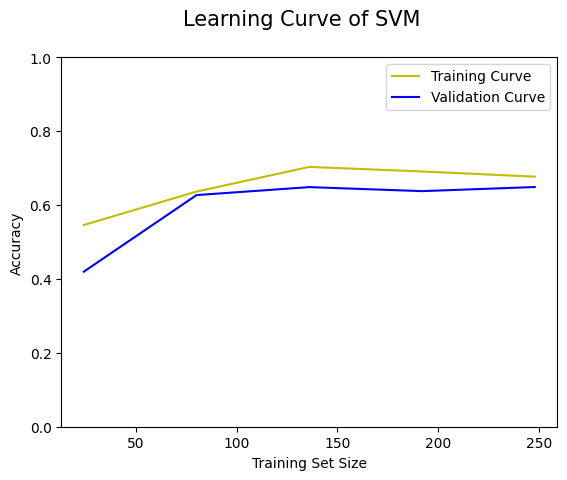

In [ ]:
#@title Learning Curves

# Learning curve
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(model_svm, variables, target, cv = k_folds)
pyplot.plot(train_sizes_svm, train_scores_svm.mean(axis = 1), color='y', label='Training Curve')
pyplot.plot(train_sizes_svm, test_scores_svm.mean(axis = 1), color='b', label='Validation Curve')
pyplot.suptitle('Learning Curve of SVM', fontsize = 15)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
pyplot.legend()
pyplot.ylim(0,1)
plt.show()

**Interpretasi**
- Pada awal training, performa model pada data training dan testing terbilang rendah.
- Seiring bertambahnya data testing, validation curve semakin meningkat. Hal yang sama juga berlaku pada data training dan training curve.
- Semakin bertambah jumlah data testing, validation curve semakin mendekati training curve. Hal ini menunjukkan bahwa kurva yang diperoleh adalah **goodfit.**

## **Model Evaluation**

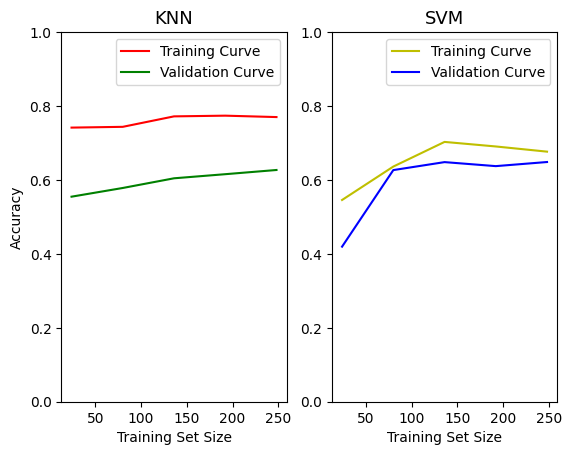

In [ ]:
#@title Learning Curve Comparasion

# Display learning curves
## KNN
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(model_knn, variables, target, cv = k_folds)
pyplot.plot(train_sizes_knn, train_scores_knn.mean(axis = 1), color='r', label='Training Curve')
pyplot.plot(train_sizes_knn, test_scores_knn.mean(axis = 1), color='g', label='Validation Curve')
plt.title('KNN', fontsize = 13)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
pyplot.legend()
pyplot.ylim(0,1)

## SVC
plt.subplot(1, 2, 2) # row 1, col 2 index 2
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(model_svm, variables, target, cv = k_folds)
pyplot.plot(train_sizes_svm, train_scores_svm.mean(axis = 1), color='y', label='Training Curve')
pyplot.plot(train_sizes_svm, test_scores_svm.mean(axis = 1), color='b', label='Validation Curve')
plt.title('SVM', fontsize = 13)
plt.xlabel("Training Set Size")
pyplot.legend()
pyplot.ylim(0,1)

plt.show()

Jika dilihat dari learning curve, terlihat bahwa **model SVM** jauh lebih baik. Selanjutnya, lakukan metrics evaluation untuk memastikan model final yang akan di-*improve*.

In [ ]:
#@title Metrics Evaluation

# Import libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Perhitungan metrics evaluation
metrics_knn = [
    accuracy_score(test_target, target.predict_knn),
    precision_score(test_target, target.predict_knn),
    recall_score(test_target, target.predict_knn),
    f1_score(test_target, target.predict_knn)
]
metrics_svm = [
    accuracy_score(test_target, target.predict_svm),
    precision_score(test_target, target.predict_svm),
    recall_score(test_target, target.predict_svm),
    f1_score(test_target, target.predict_svm)
]

# Tampilkan metrics evaluation
display(pd.DataFrame(
    [metrics_knn, metrics_svm, [metric_knn - metric_svm for metric_knn, metric_svm in zip(metrics_knn, metrics_svm)]],
    index=['KNN', 'SVM', 'Difference'],
    columns=['Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score']
))

,Accuracy_score,Precision_score,Recall_score,F1_score
KNN,0.678571,0.781250,0.694444,0.735294
SVM,0.732143,0.769231,0.833333,0.800000
Difference,-0.053571,0.012019,-0.138889,-0.064706


Dari perbandingan diatas, dipilih **model SVM** karena memiliki learning curve yang lebih baik dengan akurasi yang tidak berbeda jauh dengan model KNN. Selain itu, perbedaan nilai presisi dan recall (sensitivitas) pun terbilang rendah.

## **Model Improvement: Hyperparameter Tuning**

In [ ]:
#@title Pemilihan Parameter

# Import library
from sklearn.model_selection import GridSearchCV

# Parameter yang akan di-tuning
parameters = {
    'C': [0.1, 1, 10, 100,],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel':['linear', 'rbf']
}

# Tuning
model_svm_tuned = GridSearchCV(model_svm, parameters).fit(variables, target)

# Menentukan parameter yang terbaik
print("Diperoleh parameter terbaik untuk model, yakni:", model_svm_tuned.best_params_)

Diperoleh parameter terbaik untuk model, yakni: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
#@title Model Training

# Training model tuning
model = SVC(
    C = 0.1,
    gamma = 1,
    kernel = 'linear'
).fit(train_variables, train_target)

# Prediksi model
target_predict = model.predict(test_variables)

# Classification report
print(classification_report(test_target, target_predict))

# Evaluasi akurasi model
accuracy = accuracy_score(test_target, target_predict)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.90      0.97      0.93        36

    accuracy                           0.91        56
   macro avg       0.92      0.89      0.90        56
weighted avg       0.91      0.91      0.91        56

Accuracy: 0.9107142857142857


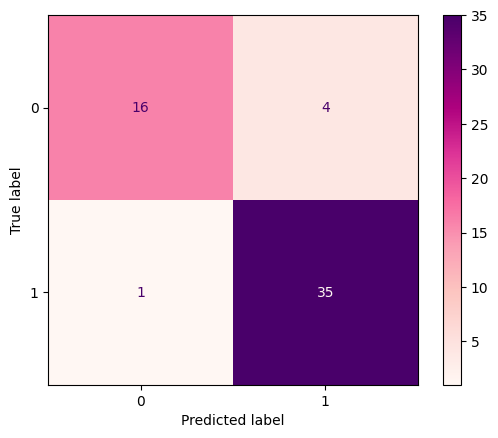

,Model,True Positive,False Positive,False Negative,True Negative
0,SVC,11,9,6,30
1,SVC Tuned,16,4,1,35
2,Difference,+ 5,- 5,- 5,+ 5


In [ ]:
#@title Comparasion: Confusion Matrix

# Membuat matriks
matrix = confusion_matrix(test_target, target_predict)
ConfusionMatrixDisplay(matrix).plot(cmap = 'RdPu')
plt.show()

# Perbandingan dengan nilai sebelum tuning
data = {"Model": ["SVM", "SVM Tuned", "Difference"],
        "True Positive": [11, 16, '+ 5'],
        "False Positive": [9 ,4, '- 5'],
        "False Negative": [6 ,1, '- 5'],
        "True Negative": [30 ,35, '+ 5']
}

df = pd.DataFrame(data)
df

**Interpretasi:** Jelas terlihat bahwa model SVM yang sudah di-*tuning* memberikan lebih banyak nilai data benar `(true positive/negative)`. Hal ini menunjukkan bahwa model tersebut memiliki performa yang lebih baik.

In [ ]:
#@title Cross-Validation
scores = cross_val_score(model, variables, target, cv = k_folds)
print(f'Average cross validation score = {scores.mean()}')
display(pd.DataFrame(scores, columns=['score']).T)

Average cross validation score = 0.8443121693121693


,0,1,2,3,4,5,6,7,8,9
score,0.857143,0.75,0.892857,0.785714,0.892857,0.857143,1.0,0.777778,0.814815,0.814815


**Interpretasi:** Dari 10 iterasi, diperoleh skor rata-rata sebesar 0,844. Angka ini jauh lebih besar dibanding model SVM (0,641. Selisih 0,203).

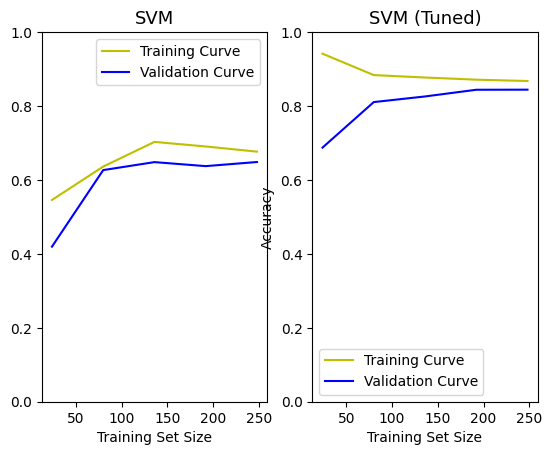

In [ ]:
#@title Comparasion: Learning Curve

## SVM
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(model_svm, variables, target, cv = k_folds)
pyplot.plot(train_sizes_svm, train_scores_svm.mean(axis = 1), color='y', label='Training Curve')
pyplot.plot(train_sizes_svm, test_scores_svm.mean(axis = 1), color='b', label='Validation Curve')
plt.title('SVM', fontsize = 13)
plt.xlabel("Training Set Size")
pyplot.legend()
pyplot.ylim(0,1)

## SVM Tuned
plt.subplot(1, 2, 2) # row 1, col 2 index 2
train_sizes, train_scores, test_scores = learning_curve(model, variables, target, cv = k_folds)
pyplot.plot(train_sizes, train_scores.mean(axis = 1), color='y', label='Training Curve')
pyplot.plot(train_sizes, test_scores.mean(axis = 1), color='b', label='Validation Curve')
plt.title('SVM (Tuned)', fontsize = 13)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
pyplot.legend()
pyplot.ylim(0,1)
plt.show()

Jika dilihat dari learning curve, terlihat bahwa **model SVM (Tuned)** jauh lebih baik. Selanjutnya, lakukan metrics evaluation untuk memastikan model tersebut sudah jauh lebih baik.

In [ ]:
#@title Metrics Evaluation

# Import libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Perhitungan metrics evaluation
metrics_svm = [
    accuracy_score(test_target, target.predict_svm),
    precision_score(test_target, target.predict_svm),
    recall_score(test_target, target.predict_svm),
    f1_score(test_target, target.predict_svm)
]
metrics_svm_tuned = [
    accuracy_score(test_target, target_predict),
    precision_score(test_target, target_predict),
    recall_score(test_target, target_predict),
    f1_score(test_target, target_predict)
]

# Tampilkan metrics evaluation
display(pd.DataFrame(
    [metrics_svm, metrics_svm_tuned, [metrics_svm - metrics_svm_tuned for metrics_svm, metrics_svm_tuned in zip(metrics_svm, metrics_svm_tuned)]],
    index=['SVM', 'SVM (Tuned)', 'Difference'],
    columns=['Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score']
))

,Accuracy_score,Precision_score,Recall_score,F1_score
SVM,0.732143,0.769231,0.833333,0.800000
SVM (Tuned),0.910714,0.897436,0.972222,0.933333
Difference,-0.178571,-0.128205,-0.138889,-0.133333


Dari perbandingan diatas, terlihat bahwa model SVM (Tuned) **jauh lebih baik** karena memiliki selisih skor yang cukup tinggi ( > 0.1) dibanding model SVM sebelumnya.

# **Kesimpulan**

Model machine learning yang paling sesuai untuk memprediksi peluang pasien terkena penyakit jantung berdasarkan data kesehatan adalah SVM dengan parameter

*   C: 0,1
*   Gamma: 1
* Kernel: linear

dan dengan skor akurasi 0,9107.

